<a href="https://colab.research.google.com/github/sairahulkhanapuram/AIML-ASSIGNMENTS/blob/main/AIML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/breast_cancer_survival.csv')
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [2]:
d['Gender'] = d['Gender'].map({'FEMALE': 0, 'MALE': 1})
d['Tumour_Stage'] = d['Tumour_Stage'].map({'I': 1, 'II': 2, 'III': 3})
d['Histology'] = d['Histology'].factorize()[0]
d['ER status'] = d['ER status'].map({'Positive': 1, 'Negative': 0})
d['PR status'] = d['PR status'].map({'Positive': 1, 'Negative': 0})
d['HER2 status'] = d['HER2 status'].map({'Positive': 1, 'Negative': 0})
d['Surgery_type'] = d['Surgery_type'].factorize()[0]
d['Patient_Status'] = d['Patient_Status'].map({'Alive': 1, 'Dead': 0})
d['Date_of_Surgery']=d['Date_of_Surgery'].map({'20-May-18':0,'26-Apr-18':1,'24-Aug-18':2,'16-Nov-18':3,'12-Dec-18':4,'15-Jan-19':5,'25-Jul-18':6,'26-Mar-19':7,'26-Nov-18':8,'04-Feb-19':9})
d['Date_of_Last_Visit']=d['Date_of_Last_Visit'].map({'26-Aug-18':0,'25-Jan-19':1,'08-Apr-20':2,'28-Jul-20':3,'05-Jan-19':4,'27-Mar-20':5,'23-Apr-19':6,'11-Oct-19':7,'05-Dec-18':8,'10-Aug-19':9})
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0            0          1          1        

In [3]:
y=d['Patient_Status']
print(y)

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
329    1.0
330    1.0
331    0.0
332    1.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64


In [4]:
x=d.drop('Patient_Status',axis=1)
print(x)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0            0          1          1        

In [5]:
x.fillna(x.mean(),inplace=True)

In [6]:
x.isna().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [7]:
y.isna().sum()

13

In [8]:
y.fillna(y.mean(),inplace=True)

In [9]:
y=y.astype(int)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

0.7313432835820896


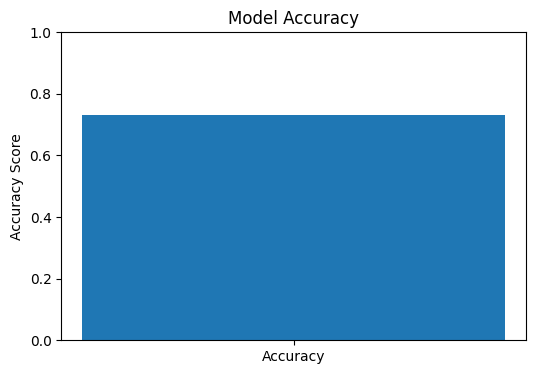

In [14]:
!pip install matplotlib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

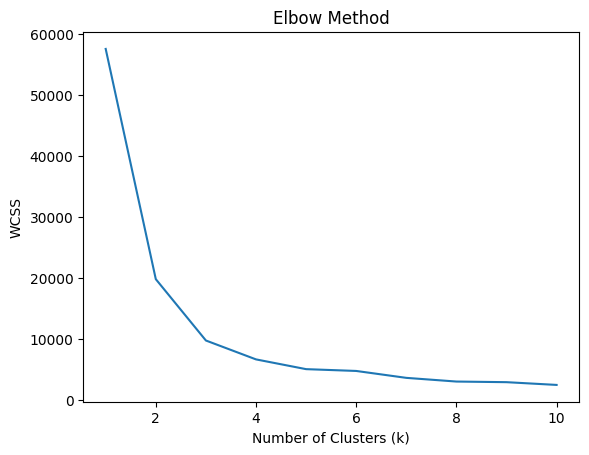

Cluster Centers:
[[ 6.17120000e+01  8.00000000e-03 -1.52906880e-02  9.90108104e-01
  -1.22924582e-01  4.84910957e-02  2.00000000e+00  2.88000000e-01
   1.00000000e+00  1.00000000e+00  6.40000000e-02  1.26400000e+00
   5.00000000e+00  4.60133333e+00]
 [ 4.67642857e+01  1.42857143e-02 -1.98531204e-02  9.51350329e-01
  -3.72439800e-02 -6.37867950e-02  2.17142857e+00  4.00000000e-01
   1.00000000e+00  1.00000000e+00  1.07142857e-01  1.50714286e+00
   4.92142857e+00  4.55416667e+00]
 [ 7.83623188e+01  1.44927536e-02 -7.71926377e-02  8.59576319e-01
  -1.38382577e-01  8.91077188e-02  1.89855072e+00  3.04347826e-01
   1.00000000e+00  1.00000000e+00  8.69565217e-02  1.30434783e+00
   5.15942029e+00  4.60990338e+00]]


In [15]:
!pip install scikit-learn pandas matplotlib
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
df = x.copy()
df['cluster'] = kmeans.fit_predict(x)
if x.shape[1] in (2, 3):
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=df['cluster'], cmap='viridis')
    plt.title('K-means Clustering')
    plt.xlabel(x.columns[0])
    plt.ylabel(x.columns[1])
    plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)